# Final Project Baseline: House Prices- Advanced Regression Techniques
### Author: Radia Abdul Wahab, Parham Motameni, Jun Qian
### Date: Fall 2021
### Course: w207 Machine Learning






## Supplementary Notebook for PCA assessment, and its effect on Random Forest Regressor

In [10]:
# This tells matplotlib not to try opening a new window for each plot.
from pathlib import Path
import pandas as pd
import random
import warnings

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor



# internal modules
from configurations import args
from data_loader import DataLoader
from random_forest_regressor import RandomForestRegressor

%matplotlib inline


warnings.filterwarnings('ignore')

In [11]:
# download data file if it is not ready
data_file = Path(args.data_path)
if data_file.is_file():
    print("Datafile is already loaded.")
else:
    !curl -L "https://drive.google.com/uc?export=download&id=1ortEJfmlpt9-dbg5f6cTDt5nicswf5wT" > 'test.csv'
    !curl -L "https://drive.google.com/uc?export=download&id=1EG5jP5RDEIsNAMaF2m42KOyz-ZVjC8wS" > 'train.csv'
data_loader = DataLoader(args, post_eda=False)
df = data_loader.df


Datafile is already loaded.


In [12]:
# lock the seed to have repeatable results
random.seed(100)

In [13]:
missing=df.isnull().sum().sort_values(ascending=False).head(20)
missing

#######New

missing = missing[missing > 0]
percent_missing = missing * 100 / df.shape[0]
pd.concat([missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage Missing']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage Missing
PoolQC,1451,99.656593
MiscFeature,1402,96.291209
Alley,1365,93.750000
Fence,1176,80.769231
FireplaceQu,690,47.390110
LotFrontage,259,17.788462
GarageType,81,5.563187
GarageQual,81,5.563187
GarageFinish,81,5.563187
GarageCond,81,5.563187


In [14]:
# Fill missing value of 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu' as NonExist. Leave LotFrontage for further investigation
df[['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']]=df[['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']].fillna('NonExist')
missing_with_replace=df.isnull().sum().sort_values(ascending=False).head(20)
missing_with_replace

#######New

missing_with_replace = missing_with_replace[missing_with_replace > 0]
percent_missing = missing_with_replace * 100 / df.shape[0]
pd.concat([missing_with_replace, percent_missing], axis=1, 
          keys=['Missing Values After filling Non_Exist', 'Percentage Missing']).\
          sort_values(by="Missing Values After filling Non_Exist", ascending=False)

,Missing Values After filling Non_Exist,Percentage Missing
LotFrontage,259,17.788462
GarageFinish,81,5.563187
GarageCond,81,5.563187
GarageYrBlt,81,5.563187
GarageQual,81,5.563187
GarageType,81,5.563187
BsmtFinType2,38,2.609890
BsmtExposure,38,2.609890
BsmtCond,37,2.541209
BsmtFinType1,37,2.541209


# Run PCA

## Initial Look at the data:

In [15]:
# split data into Test and train
df_PCA_numeric_train, df_PCA_numeric_test, df_SalePrice_train, df_SalePrice_test = train_test_split(
    data_loader.df_X, data_loader.df_y, test_size=0.10, random_state=1)
df_PCA_numeric_train = df_PCA_numeric_train._get_numeric_data()
df_PCA_numeric_test = df_PCA_numeric_test._get_numeric_data()


In [16]:
missing=df_PCA_numeric_train.isnull().sum().sort_values(ascending=False).head(20)
missing

#######New

missing = missing[missing > 0]
percent_missing = missing * 100 / df.shape[0]
pd.concat([missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage Missing']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage Missing
LotFrontage,230,15.796703
GarageYrBlt,66,4.532967
MasVnrArea,8,0.549451


In [17]:
missing=df_PCA_numeric_test.isnull().sum().sort_values(ascending=False).head(20)
missing

#######New

missing = missing[missing > 0]
percent_missing = missing * 100 / df.shape[0]
pd.concat([missing, percent_missing], axis=1, 
          keys=['Missing Values', 'Percentage Missing']).\
          sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage Missing
LotFrontage,29,1.991758
GarageYrBlt,15,1.030220


In [18]:
# Fill missing value of 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu' as NonExist. Leave LotFrontage for further investigation
df_PCA_numeric_train[['LotFrontage','GarageYrBlt','MasVnrArea']]=df_PCA_numeric_train[['LotFrontage','GarageYrBlt','MasVnrArea']].fillna('0')
missing_with_replace=df_PCA_numeric_train.isnull().sum().sort_values(ascending=False).head(20)
missing_with_replace

#######New

missing_with_replace = missing_with_replace[missing_with_replace > 0]
percent_missing = missing_with_replace * 100 / df.shape[0]
pd.concat([missing_with_replace, percent_missing], axis=1, 
          keys=['Missing Values After filling Non_Exist', 'Percentage Missing']).\
          sort_values(by="Missing Values After filling Non_Exist", ascending=False)

,Missing Values After filling Non_Exist,Percentage Missing


In [19]:
# Fill missing value of 'PoolQC','MiscFeature','Alley','Fence','FireplaceQu' as NonExist. Leave LotFrontage for further investigation
df_PCA_numeric_test[['LotFrontage','GarageYrBlt']]=df_PCA_numeric_test[['LotFrontage','GarageYrBlt']].fillna('0')
missing_with_replace=df_PCA_numeric_test.isnull().sum().sort_values(ascending=False).head(20)
missing_with_replace

#######New

missing_with_replace = missing_with_replace[missing_with_replace > 0]
percent_missing = missing_with_replace * 100 / df.shape[0]
pd.concat([missing_with_replace, percent_missing], axis=1, 
          keys=['Missing Values After filling Non_Exist', 'Percentage Missing']).\
          sort_values(by="Missing Values After filling Non_Exist", ascending=False)

,Missing Values After filling Non_Exist,Percentage Missing


k = 0  Variance = 0.983916514199784
k = 1  Variance = 0.00443821143711705
k = 2  Variance = 0.0031869989530151485
k = 3  Variance = 0.002654561622586071
k = 4  Variance = 0.0025483814452538552
k = 5  Variance = 0.0017220834195076594
k = 6  Variance = 0.0004977127204997104
k = 7  Variance = 0.0003103773650705709
k = 8  Variance = 0.0002444858630453493
k = 9  Variance = 0.00017131819639930754
k = 10  Variance = 0.00013043028481670742
k = 11  Variance = 4.0325712033901225e-05
k = 12  Variance = 3.17861242393116e-05
k = 13  Variance = 2.8954229970193334e-05
k = 14  Variance = 2.5208835039818603e-05
k = 15  Variance = 1.552917979615013e-05
k = 16  Variance = 1.2756310103526284e-05
k = 17  Variance = 8.8389641066948e-06
k = 18  Variance = 7.928937312356004e-06
k = 19  Variance = 5.567930671480331e-06
k = 20  Variance = 1.9106835058142625e-06
k = 21  Variance = 6.956102666433143e-08
k = 22  Variance = 1.57566492166446e-08
k = 23  Variance = 8.52438280083442e-09
k = 24  Variance = 7.7063417400

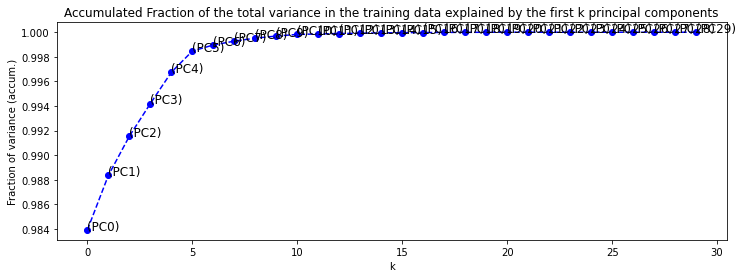

In [20]:
def PCA_Variance():
    principal_components=PCA()
    principal_components.fit(df_PCA_numeric_train)
    
    K = range(30)
    for k in K:
        partial_variance_cumsum = principal_components.explained_variance_ratio_.cumsum()
        partial_variance = principal_components.explained_variance_ratio_
        
    for k in K:
        print ("k =", k, " Variance =", partial_variance[k])
 
    
    plt.figure(figsize=(12, 4))
    plt.plot(K, partial_variance_cumsum[K],'--bo')
    plt.title('Accumulated Fraction of the total variance in the training data explained by the first k principal components')
    plt.xlabel('k')
    plt.ylabel('Fraction of variance (accum.)')
    plt.axis()
    for i_x,i_y in zip(K,partial_variance_cumsum[K]):
        plt.text(i_x,i_y,'(PC{})'.format(i_x),fontsize = 12)
        
        
    plt.show() 
    
PCA_Variance()

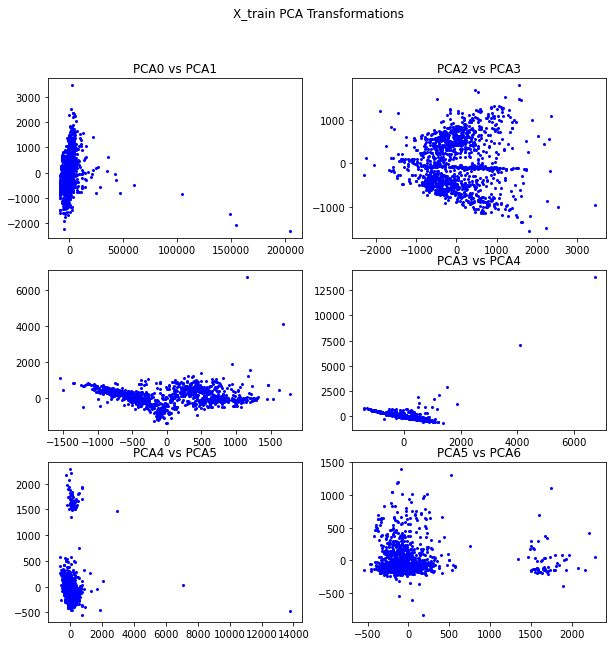

In [21]:
def PCA_variances_2D():   

    PCA_2D = PCA(n_components=10)

    PCA_transformed=PCA_2D.fit_transform(df_PCA_numeric_train)

    fig, axes = plt.subplots(3, 2, figsize=(10, 10))
    fig.suptitle('X_train PCA Transformations')
    axes[0, 0].plot(PCA_transformed[:,0],PCA_transformed[:,1], 'bo',markersize=2)
    axes[0, 0].set_title('PCA0 vs PCA1')
    
    axes[0, 1].plot(PCA_transformed[:,1], PCA_transformed[:,2], 'bo',markersize=2)
    axes[0, 1].set_title('PCA1 vs PCA2')

    axes[1, 0].plot(PCA_transformed[:,2], PCA_transformed[:,3], 'bo',markersize=2)
    axes[0, 1].set_title('PCA2 vs PCA3')

    axes[1, 1].plot(PCA_transformed[:,3], PCA_transformed[:,4], 'bo',markersize=2)
    axes[1, 1].set_title('PCA3 vs PCA4')
    
    axes[2, 0].plot(PCA_transformed[:,4], PCA_transformed[:,5], 'bo',markersize=2)
    axes[2, 0].set_title('PCA4 vs PCA5')
    
    axes[2, 1].plot(PCA_transformed[:,5], PCA_transformed[:,6], 'bo',markersize=2)
    axes[2, 1].set_title('PCA5 vs PCA6')
    
    plt.show()


PCA_variances_2D()

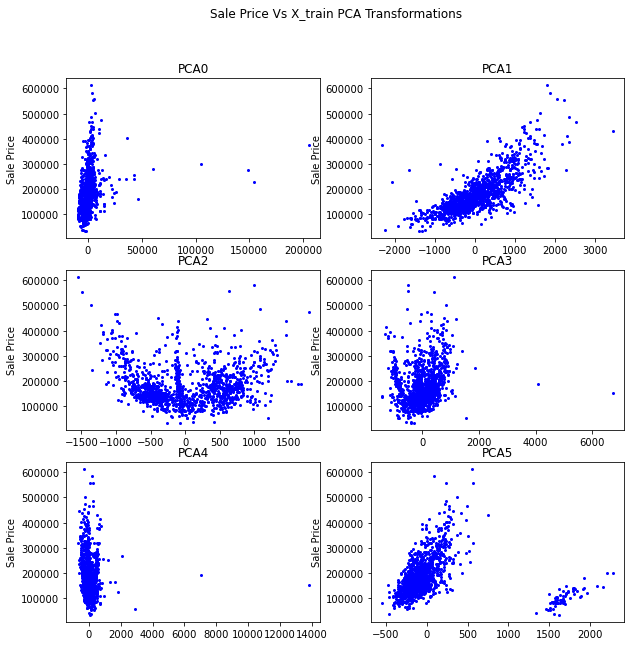

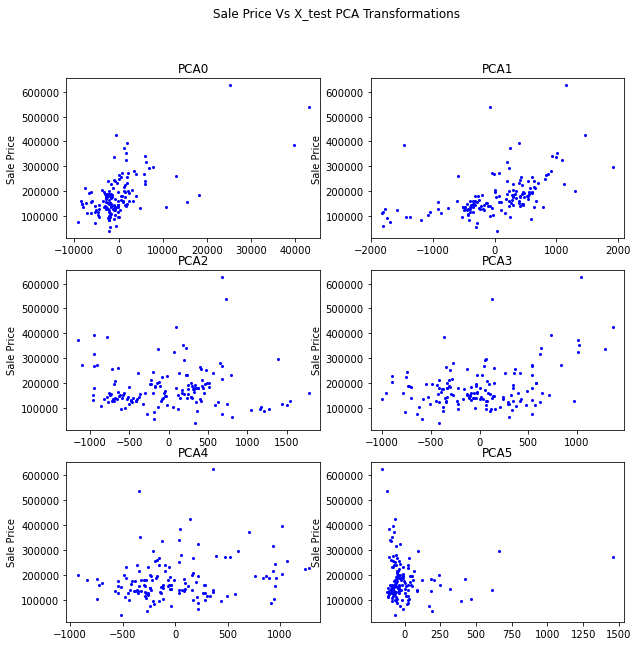

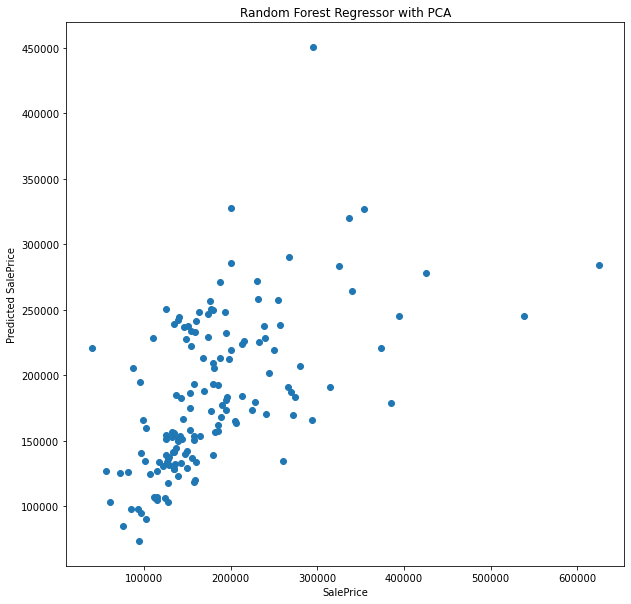

RMSE (Random Forest Regressor) =  70787.4130115039


In [22]:

def PCA_Final():   
 

    PCA_2D = PCA(n_components=6)

    PCA_transformed=PCA_2D.fit_transform(df_PCA_numeric_train)

    fig, axes = plt.subplots(3, 2, figsize=(10, 10))
    fig.suptitle('Sale Price Vs X_train PCA Transformations')
    axes[0, 0].plot(PCA_transformed[:,0],df_SalePrice_train, 'bo',markersize=2)
    axes[0, 0].set_title('PCA0')
    
    axes[0, 1].plot(PCA_transformed[:,1],df_SalePrice_train, 'bo',markersize=2)
    axes[0, 1].set_title('PCA1')


    axes[1, 0].plot(PCA_transformed[:,2],df_SalePrice_train, 'bo',markersize=2)
    axes[1, 0].set_title('PCA2')


    axes[1, 1].plot(PCA_transformed[:,3],df_SalePrice_train, 'bo',markersize=2)
    axes[1, 1].set_title('PCA3')
    
    axes[2, 0].plot(PCA_transformed[:,4],df_SalePrice_train, 'bo',markersize=2)
    axes[2, 0].set_title('PCA4')
    
    axes[2, 1].plot(PCA_transformed[:,5],df_SalePrice_train, 'bo',markersize=2)
    axes[2, 1].set_title('PCA5')
    
    for ax in axes.flat:
        ax.set(ylabel='Sale Price')
    
    plt.show()
    print('========================================================================================')
    print('')
    
    #print(PCA_transformed)
    
    df_X_processed = pd.DataFrame(PCA_transformed, columns = ['PCA0','PCA1','PCA2','PCA3','PCA4','PCA5'])
    #print(df_X_processed)
    
    #print(df_SalePrice_train)
    
    
    
    PCA_transformed_test=PCA_2D.fit_transform(df_PCA_numeric_test)

    fig, axes = plt.subplots(3, 2, figsize=(10, 10))
    fig.suptitle('Sale Price Vs X_test PCA Transformations')
    axes[0, 0].plot(PCA_transformed_test[:,0],df_SalePrice_test, 'bo',markersize=2)
    axes[0, 0].set_title('PCA0')
    
    axes[0, 1].plot(PCA_transformed_test[:,1],df_SalePrice_test, 'bo',markersize=2)
    axes[0, 1].set_title('PCA1')


    axes[1, 0].plot(PCA_transformed_test[:,2],df_SalePrice_test, 'bo',markersize=2)
    axes[1, 0].set_title('PCA2')


    axes[1, 1].plot(PCA_transformed_test[:,3],df_SalePrice_test, 'bo',markersize=2)
    axes[1, 1].set_title('PCA3')
    
    axes[2, 0].plot(PCA_transformed_test[:,4],df_SalePrice_test, 'bo',markersize=2)
    axes[2, 0].set_title('PCA4')
    
    axes[2, 1].plot(PCA_transformed_test[:,5],df_SalePrice_test, 'bo',markersize=2)
    axes[2, 1].set_title('PCA5')
    
    for ax in axes.flat:
        ax.set(ylabel='Sale Price')
    
    plt.show()
    print('========================================================================================')
    print('')
    
    #print(PCA_transformed_test)
    
    df_X_processed_test = pd.DataFrame(PCA_transformed_test, columns = ['PCA0','PCA1','PCA2','PCA3','PCA4','PCA5'])
    #print(df_X_processed_test)
    
    
    
    X_train, X_test, y_train, y_test = df_X_processed, df_X_processed_test,df_SalePrice_train,df_SalePrice_test
    regressor = RandomForestRegressor()
    regressor.fit(X_train, y_train)

    # plot dignostics
    fig, axes = plt.subplots(1, 1, figsize=(10, 10))
    plt.scatter(y_test, regressor.predict(X_test))
    plt.title('Random Forest Regressor with PCA')
    plt.xlabel('SalePrice')
    plt.ylabel('Predicted SalePrice')
    
    plt.show()
    print('========================================================================================')
    print('RMSE (Random Forest Regressor) = ',mean_squared_error(y_test, regressor.predict(X_test), squared=False))
    print('========================================================================================')



PCA_Final()